In [2]:
import pandas as pd

# Path to dataset
file_path='./data/student_performance.csv'

# load the CSV file into dataframe
df=pd.read_csv(file_path)

# Show first few rows
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [3]:
# Independent variables
X=df[['StudyHoursPerWeek', 'ParentalSupport','PreviousGrade','ExtracurricularActivities']]
y=df['FinalGrade']

# Independatan var
print('These are the independent variables')
print(X)

# targeted variable
print('\n Targeted variable')
print(y)

These are the independent variables
   StudyHoursPerWeek ParentalSupport  PreviousGrade  ExtracurricularActivities
0                 15            High             78                          1
1                 20          Medium             85                          2
2                 10             Low             65                          0
3                 25            High             90                          3
4                 18          Medium             82                          2
5                 30            High             88                          1
6                  8             Low             60                          0
7                 17          Medium             77                          1
8                 12             Low             70                          2
9                 22            High             86                          3

 Targeted variable
0    80
1    87
2    68
3    92
4    85
5    90
6    62
7    78
8    72
9  

In [6]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder= LabelEncoder()

# Encode the 'ParetalSupport' column
X_train['ParentalSupport']=label_encoder.fit_transform(X_train['ParentalSupport'])
X_test['ParentalSupport']=label_encoder.transform(X_test['ParentalSupport'])

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets(80% train and 20% test)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (8, 4)
Testing set shape: (2, 4)


In [7]:
# Model training part
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model=LinearRegression()

# train the model
model.fit(X_train, y_train)

# Print the model's coefficients (weights)
print("Model Coefficients:")
print(model.coef_)

Model Coefficients:
[-0.03295048 -0.03259529  1.00616856  0.04043626]


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on training data
y_train_pred= model.predict(X_train)

# Calculate R-Squared and MSE
r2=r2_score(y_train, y_train_pred)
mse=mean_squared_error(y_train, y_train_pred)

print(f"R-Squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-Squared: 0.9966233172495262
Mean Squared Error: 0.3393038557546339


In [9]:
# Predict on test data
y_test_pred = model.predict(X_test)

# Print or visualize the predictions
print("Predictions on Test Data:")
print(y_test_pred)


Predictions on Test Data:
[72.29305493 87.08938414]


In [10]:
# # Print the mapping of the label encoder
# print("Label Encoder Classes:", label_encoder.classes_)
# print("High-0,Low-1, Medium-2 ")


# Input your own data with encoded values
# new_data = [[20, 1, 85, 2]]  # [StudyHoursPerWeek, ParentalSupport (1 for Medium), PreviousGrade, ExtracurricularActivities]
study_hours=float(input("Enter study hours per week: "))
parental_support=int(input("Enter parental support(high-0, low-1, medium-2)"))
previous_grade=float(input("Enter previous grade: "))
ECA=int(input("Enter extracurricular activity(0,1,2 etc)"))

# Prepare the input data as a DataFrame
new_data = pd.DataFrame([[study_hours, parental_support, previous_grade, ECA]],
                        columns=['StudyHoursPerWeek', 'ParentalSupport', 'PreviousGrade', 'ExtracurricularActivities'])



# Predict using the trained model
prediction = model.predict(new_data)

print("Predicted FinalGrade:", prediction)


Predicted FinalGrade: [3.37220542]


   Actual Final Grade  Predicted Final Grade
8                  72              72.293055
1                  87              87.089384


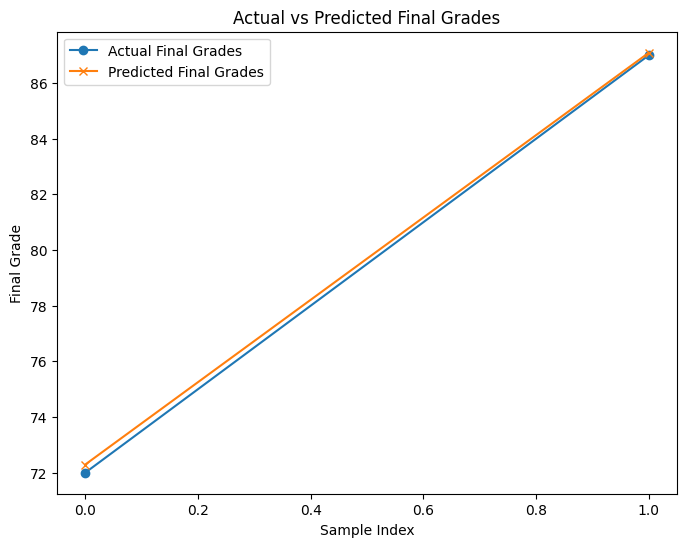

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Predict on test data
y_test_pred = model.predict(X_test)

# Create a DataFrame to compare Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Final Grade': y_test,
    'Predicted Final Grade': y_test_pred
})

# Display the comparison
print(comparison_df)

# Optionally, plot the comparison
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Actual Final Grades', marker='o')
plt.plot(y_test_pred, label='Predicted Final Grades', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Final Grade')
plt.title('Actual vs Predicted Final Grades')
plt.legend()
plt.show()



In [13]:
# Saving the model 
import joblib

# Save the trained model
joblib.dump(model, 'saved_models/final_grade_predictor.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'saved_models/label_encoder.pkl')


['saved_models/label_encoder.pkl']

<h4>Testing the saved models</h4>

In [ ]:
import pandas as pd
import joblib
import numpy as np

# Load the saved model and label encoder
loaded_model = joblib.load('saved_models/final_grade_predictor.pkl')
loaded_label_encoder = joblib.load('saved_models/label_encoder.pkl')

# Sample input data for prediction
StudyHoursPerWeek = 15
ParentalSupport = 'High'  
PreviousGrade = 78
ExtracurricularActivities = 1

try:
    # Encode the 'ParentalSupport' value using the saved label encoder
    ParentalSupport_encoded = loaded_label_encoder.transform([ParentalSupport])[0]

    # Prepare the input data as a DataFrame (matching the training data columns)
    input_data = pd.DataFrame([[StudyHoursPerWeek, ParentalSupport_encoded, PreviousGrade, ExtracurricularActivities]],
                          columns=['StudyHoursPerWeek', 'ParentalSupport', 'PreviousGrade', 'ExtracurricularActivities'])

    # Make the prediction
    prediction = loaded_model.predict(input_data)

    # Output the predicted result
    print(f"Predicted Final Grade: {prediction[0]:.2f}")
    if prediction >= 90:
        print("Excellent Student")
    elif 75 <= prediction < 90:
        print("Good Student")
    elif 50 <= prediction < 75:
        print("Average Student")
    else:
        print("Needs Improvement")
except Exception as e:
    print(f"An error occured: {e}")


Predicted Final Grade: 80.24
Good
